# Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.

관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [1]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

Subscription Key와 서비스의 주소를 설정합니다.

In [4]:
subscription_key = 'cfed609ad3ef4031bb274bb3e808e302'

In [5]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인합니다.

In [74]:
image_url='https://pbs.twimg.com/media/E_uPJtnVEAIQleT?format=jpg&name=900x900'

In [75]:
img=Image.open(BytesIO(requests.get(image_url).content))

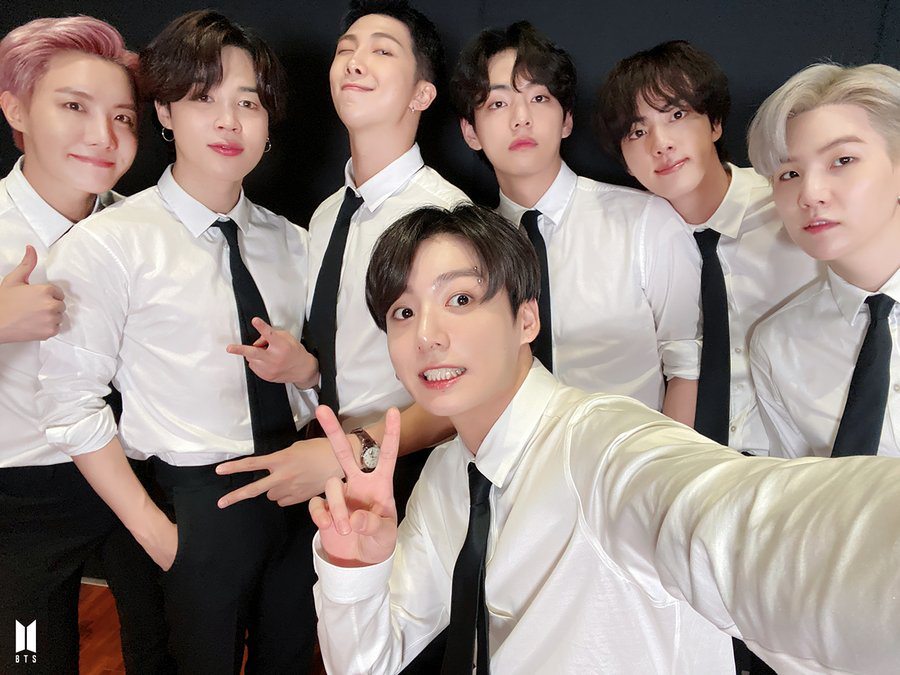

In [76]:
img

In [77]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params = {
    'returnFaceID': 'true',
    'returnFaceAttributes': 'age,gender,emotion'
}

In [78]:
data={'url':image_url}

서비스를 호출해서 결과를 확인 합니다.

In [79]:
response = requests.post(faceDetection_url,
                        headers=headers,
                        params=params,
                        json=data)

In [80]:
faces=response.json()

In [81]:
faces

[{'faceId': '90924b4d-323a-418e-8547-37388faa4ba6',
  'faceRectangle': {'top': 268, 'left': 367, 'width': 138, 'height': 138},
  'faceAttributes': {'gender': 'male',
   'age': 22.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.018,
    'disgust': 0.0,
    'fear': 0.002,
    'happiness': 0.812,
    'neutral': 0.008,
    'sadness': 0.0,
    'surprise': 0.16}}},
 {'faceId': '4ce5ce40-697f-466a-9877-42f2c11bbedb',
  'faceRectangle': {'top': 135, 'left': 758, 'width': 119, 'height': 119},
  'faceAttributes': {'gender': 'male',
   'age': 20.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.998,
    'sadness': 0.002,
    'surprise': 0.0}}},
 {'faceId': '6845341d-0b63-4ceb-858d-30878462c957',
  'faceRectangle': {'top': 81, 'left': 44, 'width': 107, 'height': 107},
  'faceAttributes': {'gender': 'female',
   'age': 26.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.002,
    'disgust': 0.0,
    'fear': 0.0,
    'h

In [82]:
draw = ImageDraw.Draw(img)

In [83]:
for face in faces:
    
    rect = face['faceRectangle']
    
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']
    
    draw.rectangle(((left,top),(left+width,top+height)), outline='red')
    
    face_info = face['faceAttributes']
    emotion = face_info['emotion']
    happiness = emotion['happiness']
    gender = face_info['gender']
    result = 'Gender:' + gender + ' happiness:' + str(happiness*100)
    
    draw.text((left, top), result, fill='red')
        

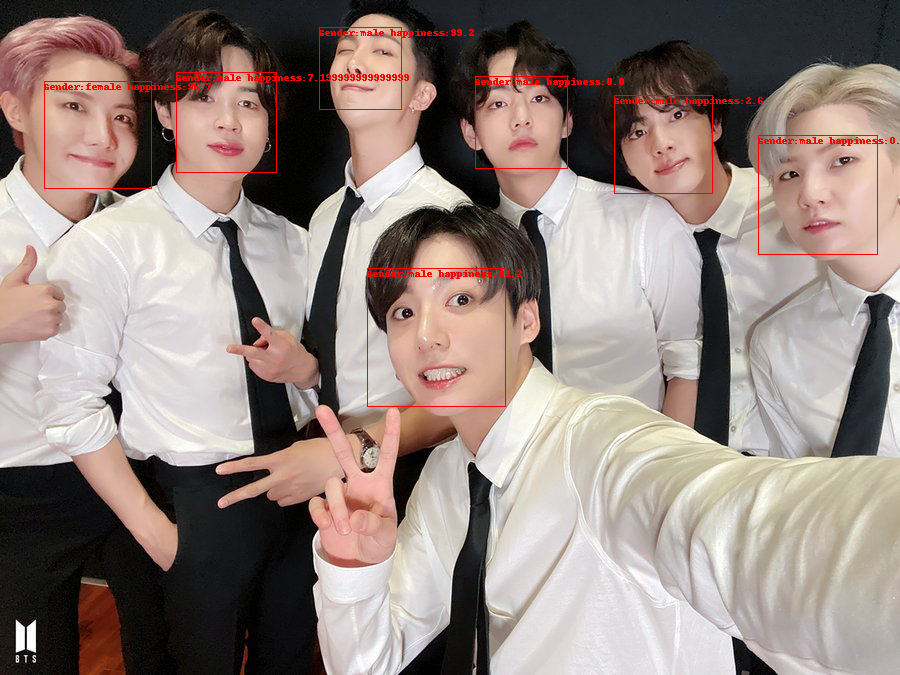

In [84]:
img